In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.shape

(891, 12)

# Missing Values

In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are nan values in the dataset. 177 records in Age feature, 687 records in Cabin Feature, 2 records in Embarked feature are missing.

# EDA

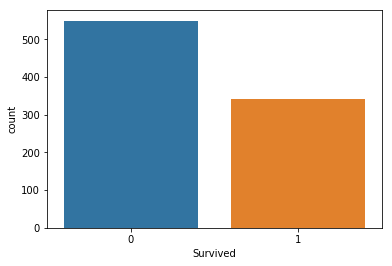

In [6]:
sns.countplot(x='Survived',data = train_df)

From the above plot we can conclude that roughly 325 persons survived. And around 500 people are not survived. So we can say that the data is almost balanced because there is no much difference among those two categories.

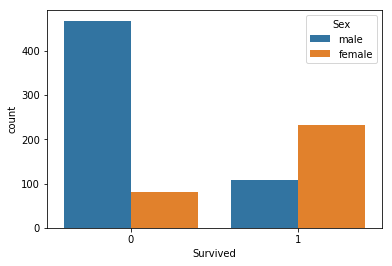

In [7]:
sns.countplot(x='Survived',hue='Sex',data=train_df)

It is very clear that most of the female passengers survived as compared to the male passengers.

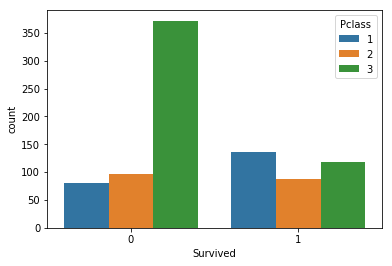

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=train_df)

People belong to Pclass 1 are survived the most as compared to the other classes and most people belong to Pclass 3 are not survived.

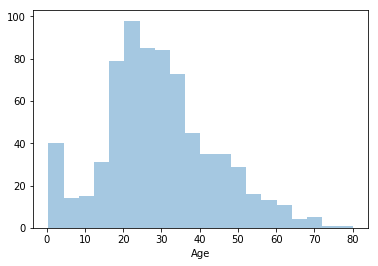

In [9]:
sns.distplot(train_df['Age'].dropna(),kde=False)

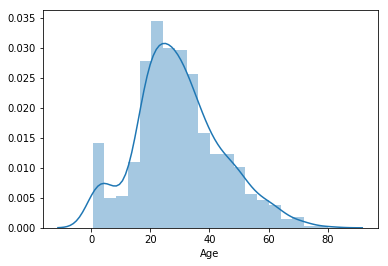

In [10]:
sns.distplot(train_df['Age'].dropna(),kde=True)

Age feature without null values is almost Gaussian Distributed

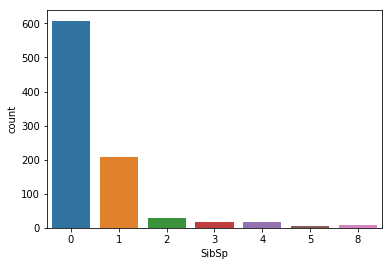

In [11]:
sns.countplot(x='SibSp',data=train_df)

Sibsp is the feature for number of Siblings/Spouses.

Most of the them either had 0 or 1 Sibling/Spouse.

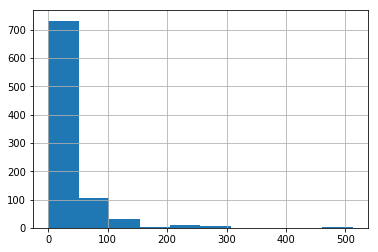

In [12]:
train_df['Fare'].hist()

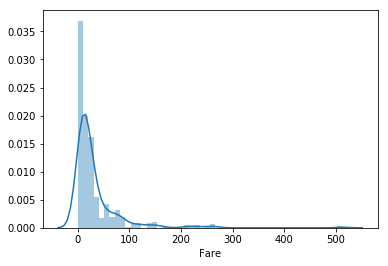

In [13]:
sns.distplot(train_df['Fare'].dropna(),kde=True)

From the above two figures, it is clear that the 'Fare' feature is Right Skewed.

# Data Cleaning

We have nan values in the Age Feature. So will clean that feature first.

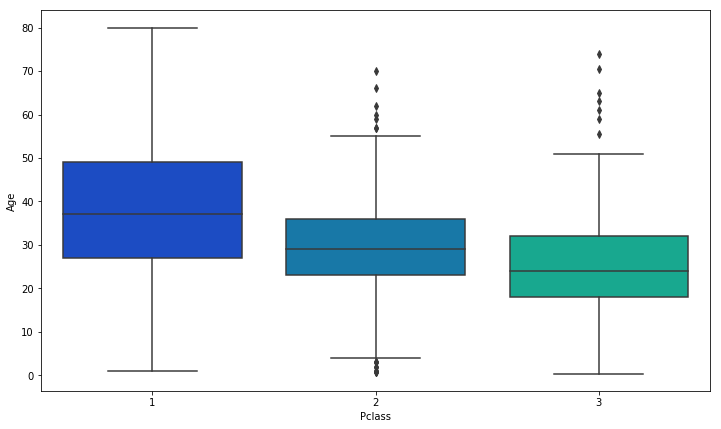

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train_df,palette='winter')

we see that most of the people belong to P1 class are aged or elder than other classes.

In [15]:
def clean_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
          #Mean is around 37 or 38 for P1 class
            return 37

        elif Pclass == 2:
          #Mean is around 29 for P2 class
            return 29

        else:
          #Mean is around 24 for P3 class
            return 24

    else:
        return Age

Replacing the nan values with the mean with respect to the Pclass.

In [16]:
train_df['Age'] = train_df[['Age','Pclass']].apply(clean_age,axis=1)

In [17]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

No null values in the Age Feature.

We have 891 records and 687 out of 891 records of Cabin Featrue have null values. That is more than 50% of the data is missing. Most of the data is missing, so I feel it is better to drop the entire feature.

In [18]:
train_df.drop('Cabin',axis=1,inplace=True)

In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


No Cabin Feature.

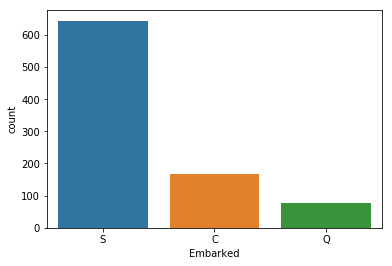

In [20]:
sns.countplot(x='Embarked',data = train_df)

Most of the data in the Embarked Feature is S. So we can either replace that two records with 'S' or we can remove the two records directly. Because removing the two records from the 891 records may not affect the output.

In [21]:
train_df.dropna(inplace=True)

In [22]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now the Data is Clean. We have handled all the missing values in the dataset.

# Handling Categorical Features.

In [23]:
train_df = train_df.drop(['PassengerId','Name','Ticket'],axis=1)

These features do not contribute to the Dependent Feature 'Survived'. So dropping those features directly.

### Now performing One Hot Encoding for the Categorical Features.

In [24]:
sex = pd.get_dummies(train_df['Sex'],drop_first=True)
embark = pd.get_dummies(train_df['Embarked'],drop_first=True)

In [25]:
sex.head(4)

,male
0,1
1,0
2,0
3,0


In [26]:
embark.head(4)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1


On performing One Hot Encoding, the text data is converted into numerical form that is, integers with the help of which our model gets trained easily.

Now lets combine these features and remove the existing features.

In [27]:
train_df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [28]:
train_df = pd.concat([train_df,sex,embark],axis=1)

In [29]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Now our data is ready for the model creation.

# Building Models

### Splitting the Data

In [30]:
# Independent Features
x =  train_df.drop('Survived',axis=1)

In [31]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [32]:
# Dependent Feature "Survived"
y = train_df['Survived']

In [33]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Train Test Split

In [34]:
from sklearn.model_selection import train_test_split as tts

In [35]:
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.30,random_state=100)

# Training and Predicting

### Logitic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [37]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
pred = log_reg.predict(x_test)
Matrix = confusion_matrix(y_test,pred)
print(Matrix)
acc = accuracy_score(y_test,pred)
print("\nAccuracy is :",acc)
print("\n",classification_report(y_test,pred))

[[137  23]
 [ 34  73]]

Accuracy is : 0.7865168539325843

               precision    recall  f1-score   support

           0       0.80      0.86      0.83       160
           1       0.76      0.68      0.72       107

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.78      0.79      0.78       267



## Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train,y_train)
pred = dtc.predict(x_test)
acc = accuracy_score(y_test,pred)
print("\nAccuracy is :",acc)
print("\n",classification_report(y_test,pred))


Accuracy is : 0.7677902621722846

               precision    recall  f1-score   support

           0       0.78      0.84      0.81       160
           1       0.74      0.65      0.69       107

    accuracy                           0.77       267
   macro avg       0.76      0.75      0.75       267
weighted avg       0.77      0.77      0.77       267



## Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier()
rfc = rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)
acc = accuracy_score(y_test,pred)
print("\nAccuracy is :",acc)
print("\n",classification_report(y_test,pred))


Accuracy is : 0.7790262172284644

               precision    recall  f1-score   support

           0       0.79      0.86      0.82       160
           1       0.76      0.66      0.71       107

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.78      0.78      0.78       267



In [42]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Predicting the test.csv

In [43]:
main_test_df = test_df

In [44]:
test_df = test_df.drop(['PassengerId','Name','Ticket',"Cabin"],axis=1)

In [45]:
sex = pd.get_dummies(test_df['Sex'],drop_first=True)
embark = pd.get_dummies(test_df['Embarked'],drop_first=True)

test_df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [46]:
test_df = pd.concat([test_df,sex,embark],axis=1)

In [47]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [48]:
test_df.isnull().sum()

Pclass     0
Age       86
SibSp      0
Parch      0
Fare       1
male       0
Q          0
S          0
dtype: int64

# Cleaning the Test Data.

In [49]:
test_df['Age'] = test_df[['Age','Pclass']].apply(clean_age,axis=1)

In [50]:
test_df.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      1
male      0
Q         0
S         0
dtype: int64

In [51]:
# There are only null values in the Fare Feature. So replacing that with the mean of the Fare feature itself.
test_df['Fare'].fillna(value = test_df['Fare'].mean(), inplace=True)

In [52]:
test_df.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
male      0
Q         0
S         0
dtype: int64

In [53]:
# No null values.

## Prediction
From the above three models, Logistic Regression has the highest accuracy with 78.6516%. So I will use this model to predict the survived.

In [54]:
Prediction = log_reg.predict(test_df)

In [55]:
Prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [56]:
main_test_df['Survived'] = Prediction

In [57]:
main_test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


# **Now our model has also predicted Survived for the test.csv and that is stored in the test_Predicted.csv**

In [58]:
main_test_df.to_csv('test_Predicted.csv')